##Common modules and data setup

import files that should be uploaded from drive or python libraries to be used

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
from sklearn.svm import SVC
from sklearn import metrics
import itertools
import seaborn as sns
print(tf.__version__)

# main libraries
import time

# visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Read data from CSV Files
from google.colab import drive
drive.mount('/content/drive')
data_3 = pd.read_csv('drive/MyDrive/creditcard_3.csv')
data_28 = pd.read_csv('drive/MyDrive/creditcard_28.csv')
data_demo = pd.read_csv('drive/MyDrive/demo_set.csv')
knn_data_demo = pd.read_csv('drive/MyDrive/creditcard.csv')

## SVM Model Setup



In [ ]:
# Setting up X and Y
svm_Y_28 = data_28['Class']
svm_Y_3 = data_3['Class']
svm_creditcard_28_X = data_28.iloc[:,1:31]
svm_creditcard_3_X = data_3.iloc[:,1:6]

# Converting X to array
svm_X_28 = np.array(svm_creditcard_28_X)
svm_X_3 = np.array(svm_creditcard_3_X)

# Splitting data
svm_X_28_train, svm_X_28_test, svm_Y_28_train, svm_Y_28_test = train_test_split(svm_X_28, svm_Y_28, test_size = 0.2, random_state = 1)
svm_X_3_train, svm_X_3_test, svm_Y_3_train, svm_Y_3_test = train_test_split(svm_X_3, svm_Y_3, test_size = 0.2, random_state = 1)

# Scaling data
scaler = MinMaxScaler()
svm_X_28_train_scaled = scaler.fit_transform(svm_X_28_train)
svm_X_28_test_scaled = scaler.fit_transform(svm_X_28_test)

svm_X_3_train_scaled = scaler.fit_transform(svm_X_3_train)
svm_X_3_test_scaled = scaler.fit_transform(svm_X_3_test)

# Instantiating model
svc_28_C1 = SVC(C=1)
svc_3_C1 = SVC(C=1)

# Training C=1
svc_28_C1.fit(svm_X_28_train_scaled, svm_Y_28_train)
print('creditcard_28: Accuracy on training set: {:.3f}'.format(svc_28_C1.score(svm_X_28_train_scaled, svm_Y_28_train)))
print('creditcard_28: Accuracy on test set: {:.3f}'.format(svc_28_C1.score(svm_X_28_test_scaled, svm_Y_28_test)))

svc_3_C1.fit(svm_X_3_train_scaled, svm_Y_3_train)
print('creditcard_3: Accuracy on training set: {:.3f}'.format(svc_3_C1.score(svm_X_3_train_scaled, svm_Y_3_train)))
print('creditcard_3: Accuracy on test set: {:.3f}'.format(svc_3_C1.score(svm_X_3_test_scaled, svm_Y_3_test)))

# Instantiating improved model
# svc_28_C1000 = SVC(C=1000)
# svc_3_C1000 = SVC(C=1000)

# Training C = 1000
# svc_28_C1000.fit(svm_X_28_train_scaled, svm_Y_28_train)
# print('creditcard_28, C=1000: Accuracy on training set: {:.3f}'.format(svc_28_C1000.score(svm_X_28_train_scaled, svm_Y_28_train)))
# print('creditcard_28, C=1000: Accuracy on test set: {:.3f}'.format(svc_28_C1000.score(svm_X_28_test_scaled, svm_Y_28_test)))

# svc_3_C1000.fit(svm_X_3_train_scaled, svm_Y_3_train)  # Fitting the model using the classifier
# print('creditcard_3, C=1000: Accuracy on training set: {:.3f}'.format(svc_3_C1000.score(svm_X_3_train_scaled, svm_Y_3_train)))
# print('creditcard_3, C=1000: Accuracy on test set: {:.3f}'.format(svc_3_C1000.score(svm_X_3_test_scaled, svm_Y_3_test)))


In [ ]:
svm_X_28_train_scaled

In [ ]:
svm_X_28

##KNN Model Setup


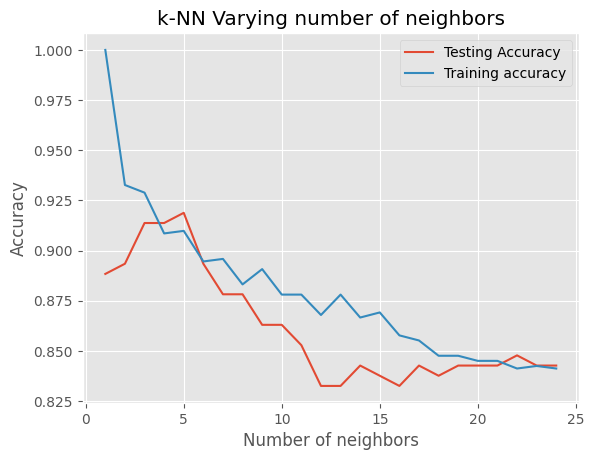


K-Nearest Neighbours
Scores
Accuracy --> 0.9187817258883249
Precison --> 0.9120879120879121
Recall --> 0.9120879120879121
F1 --> 0.9120879120879121
MCC --> 0.8366162139747045
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.91      0.91      0.91        91

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



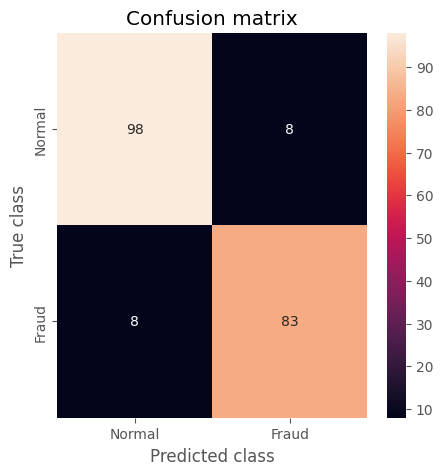

In [ ]:
#V1-V28
# prepare the data
features_28 = data_28.iloc[:,1:31]
labels_28 = data_28['Class']

feature_array_28 = features_28.values
label_array_28 = labels_28.values

# splitting the feature array and label array keeping 80% for the trainnig sets
X_train_28,X_test_28,y_train_28,y_test_28 = train_test_split(feature_array_28,label_array_28,test_size=0.20,random_state = 0)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train_28 = normalize(X_train_28)
X_test_28 = normalize(X_test_28)

neighbours_28 = np.arange(1,25)
train_accuracy_28 = np.empty(len(neighbours_28))
test_accuracy_28 = np.empty(len(neighbours_28))

for i,k in enumerate(neighbours_28):
    #Setup a knn classifier with k neighbors
    knn_28=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)

    #Fit the model
    knn_28.fit(X_train_28,y_train_28.ravel())

    #Compute accuracy on the training set
    train_accuracy_28[i] = knn_28.score(X_train_28, y_train_28.ravel())

    #Compute accuracy on the test set
    test_accuracy_28[i] = knn_28.score(X_test_28, y_test_28.ravel())

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours_28, test_accuracy_28, label='Testing Accuracy')
plt.plot(neighbours_28, train_accuracy_28, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

idx_28 = np.where(test_accuracy_28 == max(test_accuracy_28))
x_28 = neighbours_28[idx_28]
#k_nearest_neighbours_classification
knn_28=KNeighborsClassifier(n_neighbors=x_28[0],algorithm="kd_tree",n_jobs=-1)
knn_28.fit(X_train_28,y_train_28.ravel())

knn_predicted_test_labels_28=knn_28.predict(X_test_28)

knn_accuracy_score_28  = accuracy_score(y_test_28,knn_predicted_test_labels_28)
knn_precison_score_28  = precision_score(y_test_28,knn_predicted_test_labels_28)
knn_recall_score_28    = recall_score(y_test_28,knn_predicted_test_labels_28)
knn_f1_score_28        = f1_score(y_test_28,knn_predicted_test_labels_28)
knn_MCC_28             = matthews_corrcoef(y_test_28,knn_predicted_test_labels_28)

#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score_28)
print("Precison -->",knn_precison_score_28)
print("Recall -->",knn_recall_score_28)
print("F1 -->",knn_f1_score_28)
print("MCC -->",knn_MCC_28)
print(classification_report(y_test_28,knn_predicted_test_labels_28))

import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test_28, knn_predicted_test_labels_28)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

##CNN Model Setup

contains ``cnn_model_28``  setup

In [ ]:
##V1 to V28

features_28 = data_28.iloc[:,1:32]
cnn_non_fraud_28 = features_28[features_28['Class']==0]
cnn_fraud_28 = features_28[features_28['Class']==1]

cnn_non_fraud_28 = cnn_non_fraud_28.sample(cnn_fraud_28.shape[0])
cnn_data_28 = cnn_fraud_28.append(cnn_non_fraud_28, ignore_index=True)

cnn_X_28 = cnn_data_28.drop('Class', axis = 1)
cnn_y_28 = cnn_data_28['Class']
cnn_X_train_28, cnn_X_test_28, cnn_y_train_28, cnn_y_test_28 = train_test_split(cnn_X_28, cnn_y_28, test_size = 0.2, random_state = 0, stratify = cnn_y_28)
scaler = StandardScaler()
cnn_X_train_28 = scaler.fit_transform(cnn_X_train_28)
cnn_X_test_28 = scaler.transform(cnn_X_test_28)
cnn_y_train_28 = cnn_y_train_28.to_numpy()
cnn_y_test_28 = cnn_y_test_28.to_numpy()
cnn_X_train_28 = cnn_X_train_28.reshape(cnn_X_train_28.shape[0], cnn_X_train_28.shape[1], 1)
cnn_X_test_28 = cnn_X_test_28.reshape(cnn_X_test_28.shape[0], cnn_X_test_28.shape[1], 1)

epochs_28 = 25
cnn_model_28 = Sequential()
cnn_model_28.add(Conv1D(64, 2, activation='relu', input_shape = cnn_X_train_28[0].shape))
cnn_model_28.add(BatchNormalization())
cnn_model_28.add(Dropout(0.2))

cnn_model_28.add(Conv1D(128, 2, activation='relu'))
cnn_model_28.add(BatchNormalization())
cnn_model_28.add(Dropout(0.5))

cnn_model_28.add(Flatten())
cnn_model_28.add(Dense(128, activation='relu'))
cnn_model_28.add(Dropout(0.5))

cnn_model_28.add(Dense(1, activation='sigmoid'))

cnn_model_28.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history_28 = cnn_model_28.fit(cnn_X_train_28, cnn_y_train_28, epochs=epochs_28, validation_data=(cnn_X_test_28, cnn_y_test_28), verbose=1)

##SVM Demo code

In [ ]:
# Predict
svm_predict_28_C1 = svc_28_C1.predict(svm_X_28_test_scaled)
# svm_predict_3_C1 = svc_3_C1.predict(svm_X_3_test_scaled)

svm_demo_scaled = scaler.fit_transform(svm_X_28)
svm_predict_28_demo = svc_28_C1.predict(svm_demo_scaled)
svm_report_28_demo = classification_report(svm_Y_28, svm_predict_28_demo)

# svm_predict_28_C1000 = svc_28_C1000.predict(svm_X_28_test_scaled)
# svm_predict_3_C1000 = svc_3_C1000.predict(svm_X_3_test_scaled)

# svm_report_28_C1 = classification_report(svm_Y_28_test, svm_predict_28_C1)
# svm_report_3_C1 = classification_report(svm_Y_3_test, svm_predict_3_C1)
# svm_report_28_C1000 = classification_report(svm_Y_28_test, svm_predict_28_C1000)
# svm_report_3_C1000 = classification_report(svm_Y_3_test, svm_predict_3_C1000)

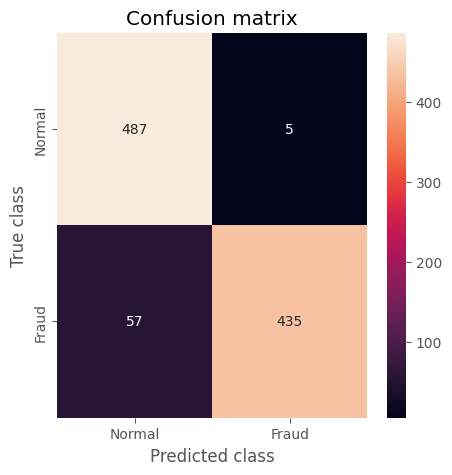

In [ ]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(svm_Y_28, svm_predict_28_demo )
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
print(svm_report_28_demo)

##KNN Demo code

In [ ]:
# Lets shuffle the data before creating the subsamples
knn_data_demo = knn_data_demo.sample(frac=1)

frauds = knn_data_demo[knn_data_demo['Class'] == 1]
non_frauds = knn_data_demo[knn_data_demo['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

##Insert KNN demo code here
demo_features = new_df.iloc[:,0:30]
demo_labels = new_df['Class']

demo_feature_array = demo_features.values
demo_label_array = demo_labels.values

demo_feature_array = normalize(demo_feature_array)

knn_28=KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",n_jobs=-1)
knn_28.fit(X_train_28,y_train_28.ravel())

demo_knn_predicted_test_labels=knn_28.predict(demo_feature_array)

demo_knn_accuracy_score  = accuracy_score(demo_label_array,demo_knn_predicted_test_labels)
demo_knn_precison_score  = precision_score(demo_label_array,demo_knn_predicted_test_labels)
demo_knn_recall_score    = recall_score(demo_label_array,demo_knn_predicted_test_labels)
demo_knn_f1_score        = f1_score(demo_label_array,demo_knn_predicted_test_labels)
demo_knn_MCC             = matthews_corrcoef(demo_label_array,demo_knn_predicted_test_labels)

#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",demo_knn_accuracy_score)
print("Precison -->",demo_knn_precison_score)
print("Recall -->",demo_knn_recall_score)
print("F1 -->",demo_knn_f1_score)
print("MCC -->",demo_knn_MCC)
print(classification_report(demo_label_array,demo_knn_predicted_test_labels))

import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(demo_label_array, demo_knn_predicted_test_labels)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


##CNN Demo code

In [ ]:
cnn_data_demo2 = pd.read_csv('drive/MyDrive/CoE197D/creditcard.csv')
def conf_plot(y_test,y_pred):
  LABELS = ['Normal', 'Fraud']
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(5, 5))
  sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()
  return

313/313 [==============================] - 2s 5ms/step


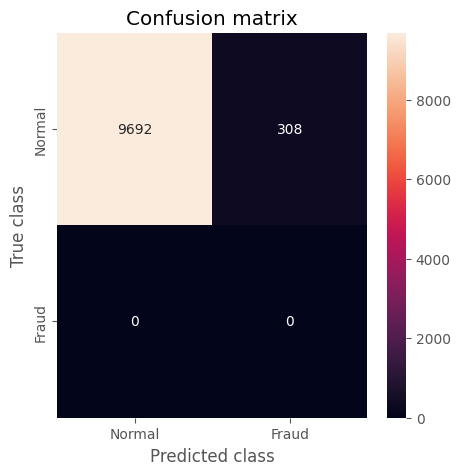

In [ ]:
cnn_non_fraud = cnn_data_demo2[cnn_data_demo2['Class']==0]
cnn_non_fraud = cnn_non_fraud.sample(10000)
cnn_data_demo_y = cnn_non_fraud['Class']
cnn_data_demo_y = cnn_data_demo_y.to_numpy()
del cnn_non_fraud[cnn_non_fraud.columns[-1]]
cnn_data_demo_x = scaler.transform(cnn_non_fraud)
cnn_data_demo_x = cnn_data_demo_x.reshape(cnn_data_demo_x.shape[0], cnn_data_demo_x.shape[1], 1)
cnn_pred_28 = cnn_model_28.predict(cnn_data_demo_x)
cnn_pred_28 = (cnn_pred_28 > 0.5)
conf_plot(cnn_data_demo_y,cnn_pred_28)